<a href="https://colab.research.google.com/github/Iagorrr04/neural-network-from-scratch/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import libs and frameworks

In [ ]:
import numpy # as np
import pandas # as pd
from matplotlib import pyplot
import random

## 2. Load data frame

In [ ]:
data = pandas.read_csv('./data/train.csv')
data.head(100)
data = numpy.array(data)
M, N = data.shape
print(f"N: {N} M: {M}.")
numpy.random.shuffle(data)

N: 785 M: 42000.


## 3. Split between dev and train.
As we want to work with arrays and linear algebra, an array will be more useful than a data frame.
The suffle method here is just to avoid overfitting.

In [ ]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:N]
X_dev = X_dev /255

data_train = data[1000:M].T
Y_train = data_train[0]
X_train = data_train[1:N]
X_train = X_train / 255

## 4. Initialize parameters

In [ ]:
def initialize_parameters():
    W1 = numpy.random.rand(10, 784) -0.5
    b1 = numpy.random.rand(10, 1) - 0.5
    W2 = numpy.random.rand(10, 10) -0.5
    b2 = numpy.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

## 5. Foward Propagation (train step 1)

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$


In [ ]:
# Remember that every parameter here is actually an array.

def ReLU(x):
    return numpy.maximum(x, 0)

def softmax(A):
    A2 = numpy.exp(A) / sum(numpy.exp(A))
    return A2
    
def foward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X)  + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

## 6. Backward Propagation (train setp 2)

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$



In [ ]:
# derivative of the activation function in the layer 1.
def derivative_ReLu(x):
    return x > 0

def one_hot(Y):
    # array full of zeros
    one_hot_Y = numpy.zeros((Y.size, Y.max()+1))
    one_hot_Y[numpy.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / M) * dZ2.dot(A1.T)
    db2 = (1 / M) * numpy.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLu(Z1)
    dW1 = (1 / M) * dZ1.dot(X.T)
    db1 = (1 / M) * numpy.sum(dZ1)

    return dW1, db1, dW2, db2


## 7. Update Parameters (train step 3)

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$


In [ ]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2

## 8. Gradient Descent.

In [ ]:
def get_predictions(A2):
    return numpy.argmax(A2, 0)

def get_accuracy(predictions, Y):
    """
        Gets the total of predictions right and returns the accuracy.
    """
    print(f"Predictions {predictions} Y: {Y}")
    
    return numpy.sum(predictions == Y) / Y.size
    
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initialize_parameters()

    gradient_curve = {"iteration": [], "accuracy": []}
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = foward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        current_accuracy = get_accuracy(get_predictions(A2), Y)

        gradient_curve['iteration'].append(int(i))
        gradient_curve['accuracy'].append(float(current_accuracy))

        if i % 10 == 0:
            print(f"Iteration : {i} Accuracy : {current_accuracy}")

    # plot the graph iteration x accuracy
    data_frame = pandas.DataFrame(gradient_curve, columns=['iteration', 'accuracy'])
    data_frame.plot(x='iteration', y='accuracy', kind='line')
    pyplot.show()

    
    return W1, b1, W2, b2

## 9. Train !

Predictions [4 0 2 ... 2 0 1] Y: [0 0 3 ... 0 2 8]
Iteration : 0 Accuracy : 0.14014634146341465
Predictions [4 0 0 ... 2 0 1] Y: [0 0 3 ... 0 2 8]
Predictions [4 0 9 ... 2 0 1] Y: [0 0 3 ... 0 2 8]
Predictions [4 0 9 ... 2 7 1] Y: [0 0 3 ... 0 2 8]
Predictions [4 0 9 ... 2 7 1] Y: [0 0 3 ... 0 2 8]
Predictions [4 0 9 ... 0 7 1] Y: [0 0 3 ... 0 2 8]
Predictions [4 0 9 ... 0 7 1] Y: [0 0 3 ... 0 2 8]
Predictions [4 0 9 ... 0 7 1] Y: [0 0 3 ... 0 2 8]
Predictions [4 0 9 ... 0 7 1] Y: [0 0 3 ... 0 2 8]
Predictions [4 0 9 ... 0 7 1] Y: [0 0 3 ... 0 2 8]
Predictions [4 0 9 ... 0 7 1] Y: [0 0 3 ... 0 2 8]
Iteration : 10 Accuracy : 0.2506829268292683
Predictions [4 0 9 ... 0 7 1] Y: [0 0 3 ... 0 2 8]
Predictions [4 0 9 ... 0 7 1] Y: [0 0 3 ... 0 2 8]
Predictions [4 0 9 ... 0 7 1] Y: [0 0 3 ... 0 2 8]
Predictions [4 0 9 ... 0 7 1] Y: [0 0 3 ... 0 2 8]
Predictions [4 0 9 ... 0 7 1] Y: [0 0 3 ... 0 2 8]
Predictions [0 0 9 ... 0 7 1] Y: [0 0 3 ... 0 2 8]
Predictions [0 0 9 ... 0 7 1] Y: [0 0 3 ...

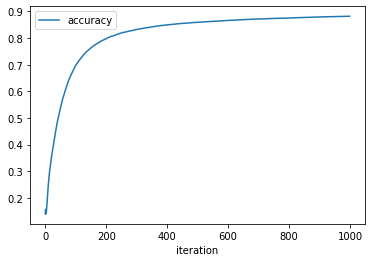

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

## 10. Visualize results

Prediction: [2] Label : 2


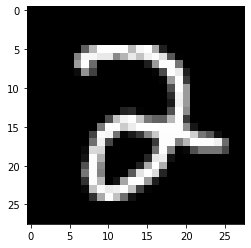

Prediction: [6] Label : 6


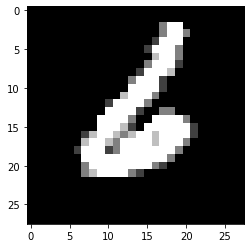

Prediction: [5] Label : 5


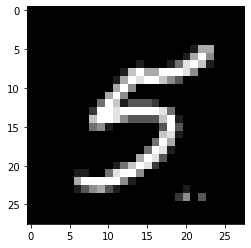

Prediction: [5] Label : 6


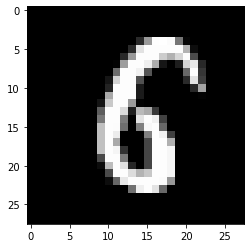

Prediction: [2] Label : 2


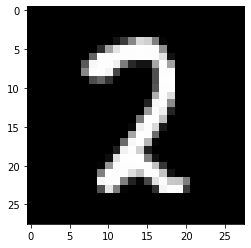

Prediction: [3] Label : 3


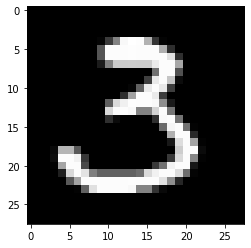

Prediction: [6] Label : 6


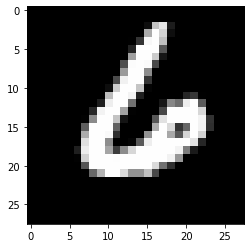

Prediction: [2] Label : 2


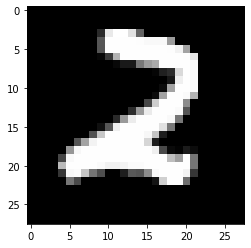

Prediction: [2] Label : 2


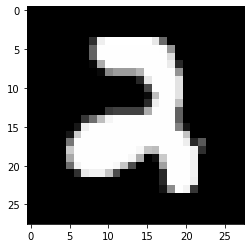

Prediction: [1] Label : 1


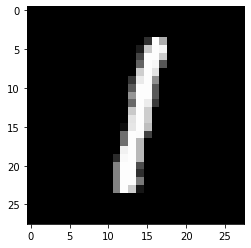

Prediction: [0] Label : 0


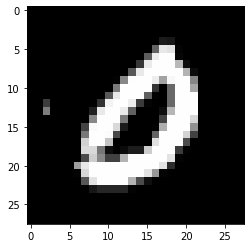

Prediction: [6] Label : 6


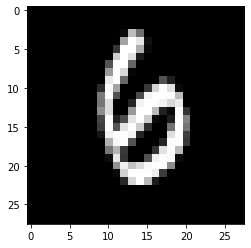

Prediction: [7] Label : 7


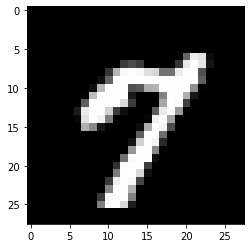

Prediction: [3] Label : 3


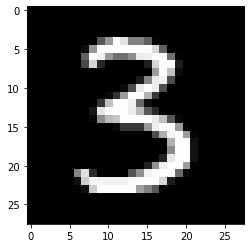

Prediction: [0] Label : 0


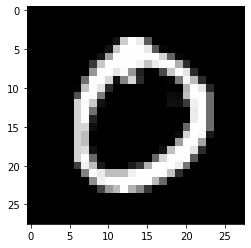

Prediction: [6] Label : 6


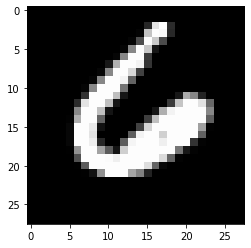

Prediction: [4] Label : 4


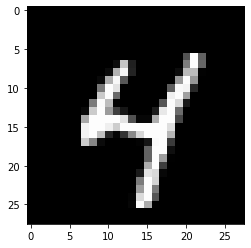

Prediction: [2] Label : 2


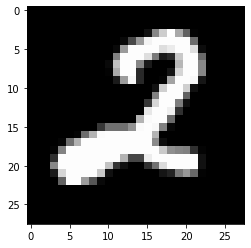

Prediction: [7] Label : 7


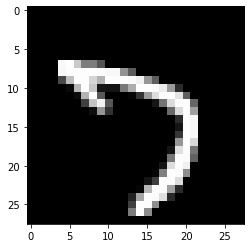

Prediction: [8] Label : 8


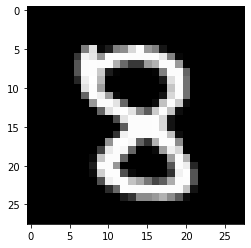

Prediction: [2] Label : 2


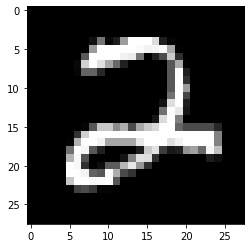

Prediction: [1] Label : 1


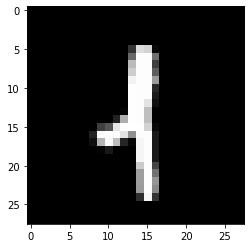

Prediction: [0] Label : 0


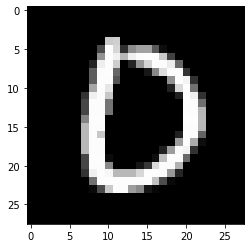

Prediction: [0] Label : 5


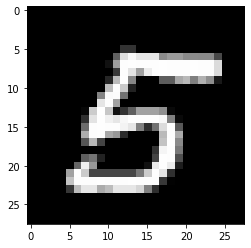

Prediction: [8] Label : 8


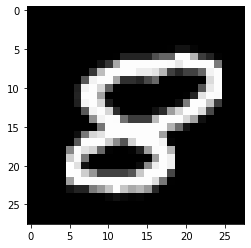

Prediction: [3] Label : 3


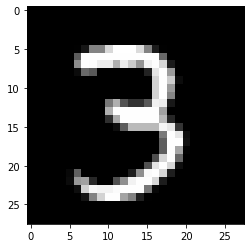

Prediction: [7] Label : 7


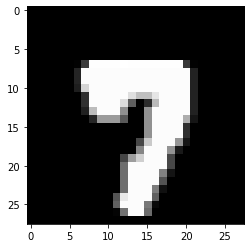

Prediction: [0] Label : 0


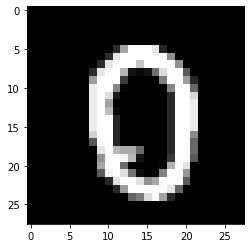

Prediction: [0] Label : 0


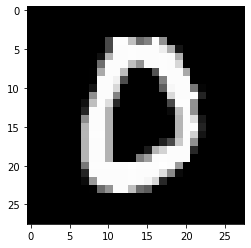

Prediction: [6] Label : 6


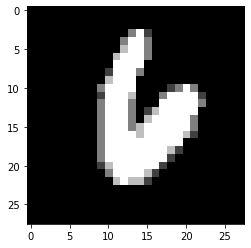

In [ ]:
from random import randint


def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = foward_propagation(W1, b1, W2, b2, X)
    precictions = get_predictions(A2)
    return precictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print(f"Prediction: {prediction} Label : {label}")

    # Shows the image.
    current_image = current_image.reshape((28, 28)) * 255   
    pyplot.gray()
    pyplot.imshow(current_image, interpolation='nearest')
    pyplot.show()


random.seed(1)
for i in range(30):
    test_prediction(randint(1, N), W1, b1, W2, b2)